# **Install Kaggle**

In [1]:
!pip install kaggle

# **Install TensorFlowJs**

In [2]:
!pip install tensorflowjs

# **Import Package dan Library**

In [3]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image
import numpy as np
import pickle
# from google.colab import files
from tensorflow import keras
import tensorflow as tf
from tensorflow import keras
# import tensorflowjs as tfjs
# from tensorflow.keras.models import load_model

# **Membuat Direktori Kaggle dan Upload kaggle.json**

Untuk mendapatkan file kaggle.json, caranya :


1. Buka kaggle
2. Login Akun
3. Pilih Profile di Kanan Atas
4. Pilih Setting
5. Cari API
6. Create New Token
7. Upload file tersebut ke direktori kaggle   



In [4]:
# Create .kaggle directory and upload kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# **Download Dataset Menggunnakan API Kaggle**

In [5]:
# Nama file zip dari dataset yang akan diunduh
dataset_zip = 'rice-leaf-disease-image.zip'
dataset_dir = 'rice-leaf-disease-image'

# Cek apakah dataset sudah ada
if not os.path.exists(dataset_zip) and not os.path.exists(dataset_dir):
    !kaggle datasets download -d nirmalsankalana/rice-leaf-disease-image
else:
    print("Dataset sudah ada, tidak perlu diunduh lagi.")


Dataset sudah ada, tidak perlu diunduh lagi.


# **Unzip Dataset**

In [7]:
import os
import zipfile

# Nama file zip dari dataset yang akan diunduh
dataset_zip = 'rice-leaf-disease-image.zip'

# Direktori di mana dataset akan diekstraksi
extract_dir = 'rice-leaf-disease-image'

# Cek apakah file zip sudah diunduh dan direktori ekstraksi sudah ada
if os.path.exists(dataset_zip):
    if not os.path.exists(extract_dir):
        print("Mengekstraksi dataset...")
        os.makedirs(extract_dir, exist_ok=True)  # Membuat direktori jika belum ada
        with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
            zip_ref.extractall(extract_dir)
        print("Ekstraksi selesai.")
    else:
        print("Dataset sudah diekstraksi, tidak perlu di-unzip lagi.")
else:
    print(f"File {dataset_zip} tidak ditemukan.")


Dataset sudah diekstraksi, tidak perlu di-unzip lagi.


# **Mengorganisir Path Dataset**



In [8]:
source_path = extract_dir
source_path_Bacterialblight = os.path.join(source_path, 'Bacterialblight')
source_path_Blast = os.path.join(source_path, 'Blast')
source_path_Brownspot = os.path.join(source_path, 'Brownspot')
source_path_Tungro = os.path.join(source_path, 'Tungro')

# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_Bacterialblight))} images of Bacterialblight.")
print(f"There are {len(os.listdir(source_path_Blast))} images of Blast.")
print(f"There are {len(os.listdir(source_path_Brownspot))} images of Brownspot.")
print(f"There are {len(os.listdir(source_path_Tungro))} images of Tungro.")

There are 1584 images of Bacterialblight.
There are 1440 images of Blast.
There are 1600 images of Brownspot.
There are 1308 images of Tungro.


# **Menampilkan Dataset**



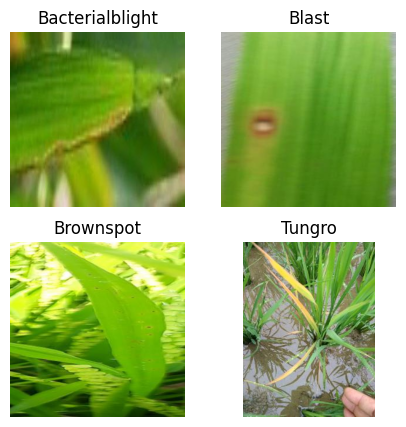

In [9]:
# Fungsi untuk menampilkan satu gambar dari setiap kelas
def show_sample_image(image_dir, class_name):
    image_path = os.path.join(image_dir, os.listdir(image_dir)[0])
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')

# Menampilkan satu gambar dari setiap kelas
plt.figure(figsize=(5, 5))

plt.subplot(2, 2, 1)
show_sample_image(source_path_Bacterialblight, 'Bacterialblight')

plt.subplot(2, 2, 2)
show_sample_image(source_path_Blast, 'Blast')

plt.subplot(2, 2, 3)
show_sample_image(source_path_Brownspot, 'Brownspot')

plt.subplot(2, 2, 4)
show_sample_image(source_path_Tungro, 'Tungro')

plt.show()

# **Membuat Direktori Training, Validation, dan Test**



In [12]:
root_dir = 'RLDI'
if os.path.exists(root_dir):
    shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):
    os.makedirs(os.path.join(root_path, 'training/Bacterialblight'))
    os.makedirs(os.path.join(root_path, 'training/Blast'))
    os.makedirs(os.path.join(root_path, 'training/Brownspot'))
    os.makedirs(os.path.join(root_path, 'training/Tungro'))
    os.makedirs(os.path.join(root_path, 'validation/Bacterialblight'))
    os.makedirs(os.path.join(root_path, 'validation/Blast'))
    os.makedirs(os.path.join(root_path, 'validation/Brownspot'))
    os.makedirs(os.path.join(root_path, 'validation/Tungro'))
    os.makedirs(os.path.join(root_path, 'test'))


try:
    create_train_val_dirs(root_path=root_dir)
except FileExistsError:
    print("You should not be seeing this since the upper directory is removed beforehand")

In [13]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

RLDI\test
RLDI\training
RLDI\validation
RLDI\training\Bacterialblight
RLDI\training\Blast
RLDI\training\Brownspot
RLDI\training\Tungro
RLDI\validation\Bacterialblight
RLDI\validation\Blast
RLDI\validation\Brownspot
RLDI\validation\Tungro


# **Split Dataset Menjadi Training, Validation, dan Test**



In [14]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, TEST_DIR, SPLIT_SIZE):
    source_files = os.listdir(SOURCE_DIR)
    random.shuffle(source_files)

    num_images = len(source_files)
    num_training = int(num_images * SPLIT_SIZE[0])
    num_validation = int(num_images * SPLIT_SIZE[1])

    training_images = source_files[:num_training]
    validation_images = source_files[num_training:num_training+num_validation]
    test_images = source_files[num_training+num_validation:]

    for image_name in training_images:
        shutil.copyfile(os.path.join(SOURCE_DIR, image_name),
                        os.path.join(TRAINING_DIR, image_name))

    for image_name in validation_images:
        shutil.copyfile(os.path.join(SOURCE_DIR, image_name),
                        os.path.join(VALIDATION_DIR, image_name))

    for image_name in test_images:
        shutil.copyfile(os.path.join(SOURCE_DIR, image_name),
                        os.path.join(TEST_DIR, image_name))

In [16]:
Bacterialblight_SOURCE_DIR = "rice-leaf-disease-image/Bacterialblight"
Blast_SOURCE_DIR = "rice-leaf-disease-image/Blast"
Brownspot_SOURCE_DIR = "rice-leaf-disease-image/Brownspot"
Tungro_SOURCE_DIR = "rice-leaf-disease-image/Tungro"

TRAINING_DIR = "RLDI/training"
VALIDATION_DIR = "RLDI/validation"
TEST_DIR = "RLDI/test"


TRAINING_Bacterialblight_DIR = os.path.join(TRAINING_DIR, "Bacterialblight/")
VALIDATION_Bacterialblight_DIR = os.path.join(VALIDATION_DIR, "Bacterialblight/")

TRAINING_Blast_DIR = os.path.join(TRAINING_DIR, "Blast/")
VALIDATION_Blast_DIR = os.path.join(VALIDATION_DIR, "Blast/")

TRAINING_Brownspot_DIR = os.path.join(TRAINING_DIR, "Brownspot/")
VALIDATION_Brownspot_DIR = os.path.join(VALIDATION_DIR, "Brownspot/")


TRAINING_Tungro_DIR = os.path.join(TRAINING_DIR, "Tungro/")
VALIDATION_Tungro_DIR = os.path.join(VALIDATION_DIR, "Tungro/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_Bacterialblight_DIR)) > 0:
  for file in os.scandir(TRAINING_Bacterialblight_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_Blast_DIR)) > 0:
  for file in os.scandir(TRAINING_Blast_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_Brownspot_DIR)) > 0:
  for file in os.scandir(TRAINING_Brownspot_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_Tungro_DIR)) > 0:
  for file in os.scandir(TRAINING_Tungro_DIR):
    os.remove(file.path)

if len(os.listdir(VALIDATION_Bacterialblight_DIR)) > 0:
  for file in os.scandir(VALIDATION_Bacterialblight_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_Blast_DIR)) > 0:
  for file in os.scandir(VALIDATION_Blast_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_Blast_DIR)) > 0:
  for file in os.scandir(VALIDATION_Blast_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_Tungro_DIR)) > 0:
  for file in os.scandir(VALIDATION_Tungro_DIR):
    os.remove(file.path)


# Split data untuk setiap kelas
split_data(Bacterialblight_SOURCE_DIR, TRAINING_Bacterialblight_DIR, VALIDATION_Bacterialblight_DIR, TEST_DIR, [0.85, 0.1])
split_data(Blast_SOURCE_DIR , TRAINING_Blast_DIR, VALIDATION_Blast_DIR, TEST_DIR, [0.85, 0.1])
split_data(Brownspot_SOURCE_DIR,TRAINING_Brownspot_DIR, VALIDATION_Brownspot_DIR, TEST_DIR, [0.85, 0.1])
split_data(Tungro_SOURCE_DIR, TRAINING_Tungro_DIR,VALIDATION_Tungro_DIR, TEST_DIR, [0.85, 0.1])

print(f"Original Bacterialblight's directory has {len(os.listdir(Bacterialblight_SOURCE_DIR))} images")
print(f"Original Blast's directory has {len(os.listdir(Blast_SOURCE_DIR))} images")
print(f"Original Brownspot's directory has {len(os.listdir(Brownspot_SOURCE_DIR))} images")
print(f"Original Tungro's directory has {len(os.listdir(Tungro_SOURCE_DIR))} images")

# Menampilkan jumlah data di setiap direktori
print(f"\nThere are {len(os.listdir(TRAINING_Bacterialblight_DIR))} images of Bacterialblight for training")
print(f"There are {len(os.listdir(TRAINING_Blast_DIR))} images of Blast for training")
print(f"There are {len(os.listdir(TRAINING_Brownspot_DIR))} images of Brownspot for training")
print(f"There are {len(os.listdir(TRAINING_Tungro_DIR))} images of Tungro for training")

print(f"\nThere are {len(os.listdir(VALIDATION_Bacterialblight_DIR))} images of Bacterialblight for validation")
print(f"There are {len(os.listdir(VALIDATION_Blast_DIR))} images of Blast for validation")
print(f"There are {len(os.listdir(VALIDATION_Brownspot_DIR))} images of Brownspot for validation")
print(f"There are {len(os.listdir(VALIDATION_Tungro_DIR))} images of Tungro for validation")

print(f"\nThere are {len(os.listdir(TEST_DIR))} images in the test directory")

Original Bacterialblight's directory has 1584 images
Original Blast's directory has 1440 images
Original Brownspot's directory has 1600 images
Original Tungro's directory has 1308 images

There are 1346 images of Bacterialblight for training
There are 1224 images of Blast for training
There are 1360 images of Brownspot for training
There are 1111 images of Tungro for training

There are 158 images of Bacterialblight for validation
There are 144 images of Blast for validation
There are 304 images of Brownspot for validation
There are 130 images of Tungro for validation

There are 734 images in the test directory


# **Membuat Generator Data**

In [18]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  train_datagen = ImageDataGenerator(rescale=1/255)

  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode='categorical',
                                                      target_size=(224, 224))

  validation_datagen = ImageDataGenerator(rescale=1/255)

  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                target_size=(224, 224))

  return train_generator, validation_generator

In [19]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 5041 images belonging to 4 classes.
Found 736 images belonging to 4 classes.


# **Menggunakan Pre-trained Model (MobileNetV2)**

In [20]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the base model
base_model.trainable = False



9406464/9406464 [==============================] - 5s 1us/step


# **Membangun Model Neural Network**

In [21]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])

# **Compile Model**

In [22]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# **Train Model**

In [23]:
history = model.fit(train_generator,
                    epochs=10,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/10


158/158 [==============================] - 124s 722ms/step - loss: 0.6955 - accuracy: 0.7266 - val_loss: 0.1828 - val_accuracy: 0.9484
Epoch 2/10
158/158 [==============================] - 47s 296ms/step - loss: 0.2732 - accuracy: 0.8968 - val_loss: 0.1003 - val_accuracy: 0.9688
Epoch 3/10
158/158 [==============================] - 43s 270ms/step - loss: 0.1632 - accuracy: 0.9441 - val_loss: 0.0412 - val_accuracy: 0.9837
Epoch 4/10
158/158 [==============================] - 42s 267ms/step - loss: 0.1149 - accuracy: 0.9605 - val_loss: 0.0268 - val_accuracy: 0.9878
Epoch 5/10
158/158 [==============================] - 42s 264ms/step - loss: 0.0806 - accuracy: 0.9732 - val_loss: 0.0135 - val_accuracy: 0.9932
Epoch 6/10
158/158 [==============================] - 42s 265ms/step - loss: 0.0654 - accuracy: 0.9766 - val_loss: 0.0092 - val_accuracy: 0.9986
Epoch 7/10
158/158 [==============================] - 42s 267ms/step - loss: 0.0662 - accuracy: 0.9812 - val_loss: 0.0145 - val

# **Visualisasi Performa Model**

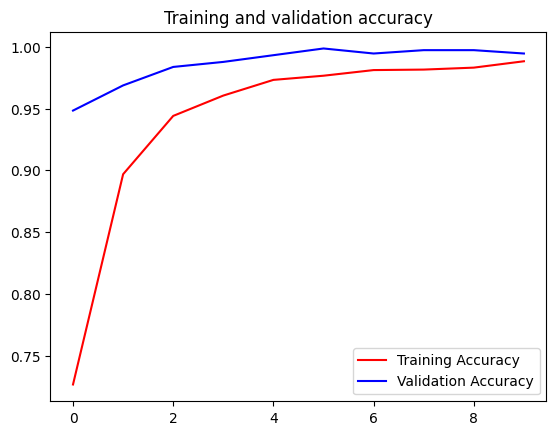

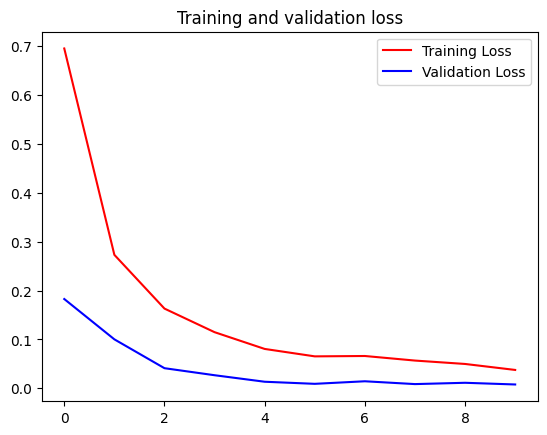

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# **Save Model**

In [27]:
model.save('my_model_mobilenetV2.h5')


In [28]:
mymodel = "modelMobileNetV2"

In [29]:
tf.saved_model.save(model, mymodel)

INFO:tensorflow:Assets written to: modelMobileNetV2\assets


INFO:tensorflow:Assets written to: modelMobileNetV2\assets


In [30]:
loaded = tf.saved_model.load(mymodel)

In [31]:
print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

['serving_default']
((), {'mobilenetv2_1_00_224_input': TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='mobilenetv2_1.00_224_input')})
{'dense_2': TensorSpec(shape=(None, 4), dtype=tf.float32, name='dense_2')}


In [32]:
converter = tf.lite.TFLiteConverter.from_saved_model(mymodel)

In [33]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]

In [34]:
def representative_data_gen():
    for _ in range(100):
        input_data, _ = validation_generator.next()
        yield [input_data.astype(np.float32)]


In [35]:
converter.representative_dataset = representative_data_gen

In [36]:
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]

In [37]:
tflite_model = converter.convert()
tflite_model_file = 'converted_model_mobileNetV2.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

# **Melakukan Prediksi Menggunakan Model yang Sudah Dilatih**

In [ ]:
# # Memuat model yang telah dilatih
# model = tf.keras.models.load_model('/content/my_model.h5')

# def preprocess_image(img_path):
#     img = image.load_img(img_path, target_size=(224, 224))
#     img_array = image.img_to_array(img)
#     img_array = np.expand_dims(img_array, axis=0)
#     img_array /= 255.0
#     return img_array

# def predict_image(model, img_path):
#     img_array = preprocess_image(img_path)
#     prediction = model.predict(img_array)
#     return prediction

# # Path gambar yang diunggah
# uploaded_image_path = '/kaggle/working/RLDI/test/BACTERAILBLIGHT3_009.jpg'  # Ganti dengan path gambar yang diunggah

# # Menampilkan gambar
# img = image.load_img(uploaded_image_path)
# plt.imshow(img)
# plt.axis('off')
# plt.show()

# # Melakukan prediksi
# prediction = predict_image(model, uploaded_image_path)

# # klasifikasi kategorikal dengan 4 kelas
# class_names = ['Bacterialblight', 'Blast', 'Brownspot', 'Tungro']
# predicted_class = np.argmax(prediction[0])
# print(f"Prediksi: {class_names[predicted_class]}")


# **Convert Model Menjadi tfjs format**

In [3]:
import tensorflow as tf
import tensorflowjs as tfjs

# Load the Keras model from the HDF5 file
saved_model_path = 'my_model_mobilenetV2.h5'
model = tf.keras.models.load_model(saved_model_path)

# Save the model in the TensorFlow SavedModel format
saved_model_dir = './saved_model'
model.save(saved_model_dir, save_format='tf')

# Use the tensorflowjs_converter to convert the SavedModel format to TensorFlow.js format
import os
os.system(f'tensorflowjs_converter --input_format=tf_saved_model {saved_model_dir} ./tfjs_model_mobilenetv2')

# Compress the converted model into a zip file
tfjs_model_dir = './tfjs_model_mobilenetv2'
shutil.make_archive('tfjs_model_mobilenetv2', 'zip', tfjs_model_dir)

NotFoundError: c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_decision_forests\tensorflow\ops\inference\inference.so not found

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.preprocessing import image
# import numpy as np
# from google.colab import files
# import matplotlib.pyplot as plt

# # Memuat model yang telah dilatih
# model = tf.keras.models.load_model('/content/my_model.h5')

# def preprocess_image(img_path):
#     img = image.load_img(img_path, target_size=(224, 224))
#     img_array = image.img_to_array(img)
#     img_array = np.expand_dims(img_array, axis=0)
#     img_array /= 255.0
#     return img_array

# def predict_image(model, img_path):
#     img_array = preprocess_image(img_path)
#     prediction = model.predict(img_array)
#     return prediction

# # Mengunggah gambar
# uploaded = files.upload()

# for file_name in uploaded.keys():
#     img_path = file_name

#     # Menampilkan gambar yang diunggah
#     img = image.load_img(img_path)
#     plt.imshow(img)
#     plt.axis('off')
#     plt.show()

#     # Melakukan prediksi
#     prediction = predict_image(model, img_path)

#     # Misalkan model Anda adalah categorical classifier dengan 4 kelas
#     class_names = ['Bacterialblight', 'Blast', 'Brownspot', 'Tungro']
#     predicted_class = np.argmax(prediction[0])
#     print(f"Prediksi: {class_names[predicted_class]}")
